NAME : V RAKSHA DHARANIKA,

ROLL NO:212223230167

In [33]:
print('v .raksha dharanika')
print('212223240148')

v .raksha dharanika
212223240148


In [34]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image


In [35]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()




In [36]:
X_train.shape


(60000, 28, 28)

In [37]:
X_test.shape


(10000, 28, 28)

In [38]:
single_image= X_train[0]

In [39]:
single_image.shape

(28, 28)

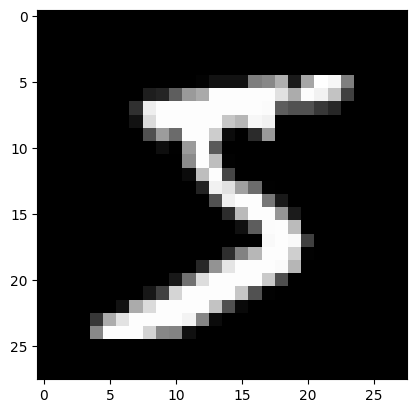

In [40]:
plt.imshow(single_image,cmap='gray')


In [41]:
y_train.shape


(60000,)

In [42]:
X_train.min()

0

In [43]:
X_train.max()

255

In [44]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [45]:
X_train_scaled.min()


0.0

In [46]:
X_train_scaled.max()


1.0

In [47]:
y_train[0]

5

In [48]:

y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [49]:
type(y_train_onehot)


numpy.ndarray

In [50]:
y_train_onehot.shape


(60000, 10)

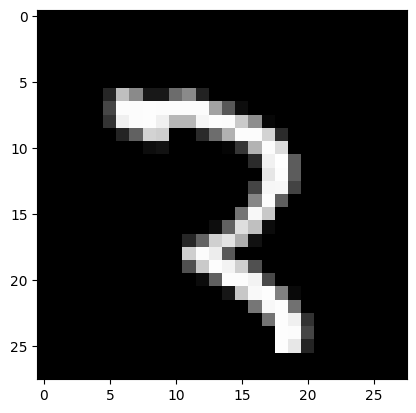

In [51]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')



In [52]:
y_train_onehot[500]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [53]:

X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)


In [58]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(30,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [59]:
print('V Raksha dharanika')
model.summary()


V Raksha dharanika
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_4 (Dense)             (None, 30)                162270    
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
Total params: 162900 (636.33 KB)
Trainable params: 162900 (636.33 KB)
Non-trainable params: 0 (0.00 B

In [60]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [61]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64, validation_data=(X_test_scaled,y_test_onehot))


Epoch 1/5
938/938 [==============================] - 26s 27ms/step - loss: 0.2340 - accuracy: 0.9312 - val_loss: 0.0926 - val_accuracy: 0.9724
Epoch 2/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0769 - accuracy: 0.9771 - val_loss: 0.0605 - val_accuracy: 0.9813
Epoch 3/5
938/938 [==============================] - 25s 26ms/step - loss: 0.0543 - accuracy: 0.9837 - val_loss: 0.0538 - val_accuracy: 0.9827
Epoch 4/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0426 - accuracy: 0.9868 - val_loss: 0.0563 - val_accuracy: 0.9812
Epoch 5/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0339 - accuracy: 0.9899 - val_loss: 0.0538 - val_accuracy: 0.9835


In [62]:
metrics = pd.DataFrame(model.history.history)

V Raksha dharanika


<Axes: >

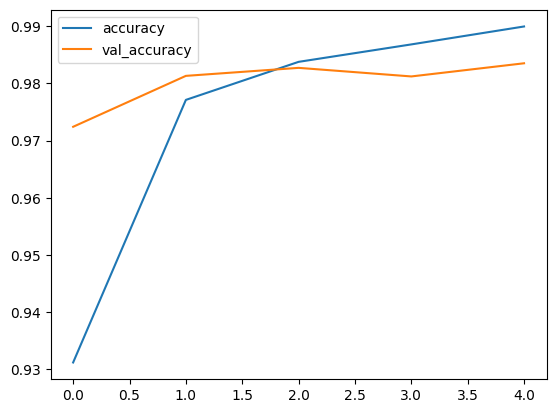

In [63]:
print("V Raksha dharanika")
metrics[['accuracy','val_accuracy']].plot()


V Raksha dharanika


<Axes: >

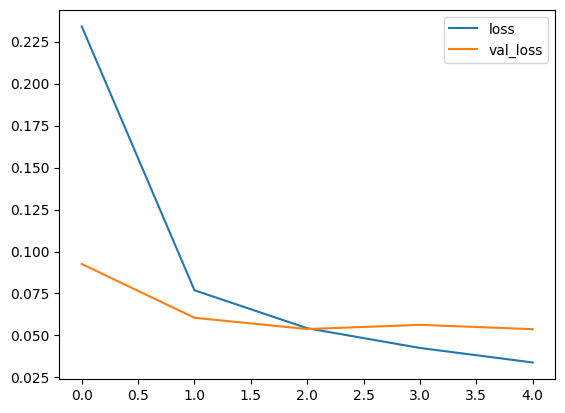

In [64]:
print('V Raksha dharanika')
metrics[['loss','val_loss']].plot()

In [65]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 5ms/step


In [66]:
print("V Raksha dharanika")
print(confusion_matrix(y_test,x_test_predictions))

V Raksha dharanika
[[ 976    0    2    0    0    1    0    1    0    0]
 [   1 1132    2    0    0    0    0    0    0    0]
 [   4    3 1012    0    2    0    1    6    4    0]
 [   1    0    1  994    0    6    0    5    3    0]
 [   3    1    0    0  970    0    0    0    1    7]
 [   3    1    0    6    0  876    5    0    1    0]
 [  16    3    2    0    3    3  930    0    1    0]
 [   1    4   10    0    0    0    0 1009    2    2]
 [   7    0    4    1    0    2    1    2  954    3]
 [   3    4    0    2    4    6    0    6    2  982]]


In [67]:
print("V Raksha dharanika")
print(classification_report(y_test,x_test_predictions))

V Raksha dharanika
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [68]:
img = image.load_img('/content/drive/MyDrive/data set/Screenshot-from-2021-03-16-10-56-56-221x300.webp')

In [69]:
type(img)

PIL.WebPImagePlugin.WebPImageFile

In [70]:
img = image.load_img('/content/drive/MyDrive/data set/Screenshot-from-2021-03-16-10-56-56-221x300.webp')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [71]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 127ms/step


In [72]:
print(x_single_prediction)

[2]


V Raksha dharanika


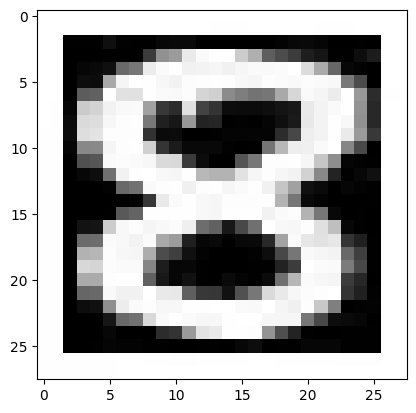

In [73]:
print("V Raksha dharanika")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


In [74]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [75]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 20ms/step


In [76]:
print(x_single_prediction)

[3]
